# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import numpy as np
import pandas as pd
#from scipy import stats
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('orange_small_churn_data.txt')
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [3]:
#Посмотрим на данные
data.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,570.000000,1006.000000,1005.000000,1275.000000,1.165000e+03,35565.000000,35560.000000,0.0,570.000000,1.165000e+03,...,1.006000e+03,1006.000000,0.0,570.000000,570.00000,1006.000000,16785.000000,266.000000,0.0,0.0
mean,11.003509,0.004970,429.328358,0.148235,2.490555e+05,1319.915394,6.792126,NaN,47.487719,3.813466e+05,...,8.067657e+04,7.419483,NaN,3.515789,16.05614,165.108310,270.585523,22637.159019,NaN,NaN
std,34.952792,0.157642,4470.405915,1.396054,6.762021e+05,2609.955770,6.287285,NaN,147.137816,9.353348e+05,...,2.141650e+05,34.642351,NaN,9.412473,54.96505,113.400173,86.723561,30843.320634,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2419.965000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,854.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,196.410000,270.000000,12612.240000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.172150e+05,1435.000000,7.000000,NaN,46.000000,2.419740e+05,...,4.260950e+04,8.000000,NaN,6.000000,14.00000,250.980000,330.000000,32209.560000,NaN,NaN
max,536.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,35.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1000.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


In [3]:
#Отбросим колонки где данных вообще нет
zero=list()
s=data.describe()
for var in s.columns:
    if s[var]['count']==0:zero.append(var)
print zero
print 'Колонки ,которые мы отбросили', len(zero)
real_columns=data.columns.drop(zero)
data=data[real_columns]

['Var8', 'Var15', 'Var20', 'Var31', 'Var32', 'Var39', 'Var42', 'Var48', 'Var52', 'Var55', 'Var79', 'Var141', 'Var167', 'Var169', 'Var175', 'Var185', 'Var209', 'Var230']
Колонки ,которые мы отбросили 18


In [6]:
    data.Var190.value_counts()#первый категориальный столбец

smXZ    10184
6dX3        6
Name: Var201, dtype: int64

In [6]:
data.shape

(40000, 212)

In [8]:
label=pd.read_csv('orange_small_churn_labels.txt',header=None)
label.head()

,0
0,-1
1,-1
2,-1
3,1
4,-1


In [8]:
label.shape

(40000, 1)

In [9]:
label[0].value_counts()

-1    37024
 1     2976
Name: 0, dtype: int64

2\. Рассчитайте доли классов `отток` и `не отток`.

In [9]:
print 'Доля оттока',(sum([1. for l in label[0] if l == 1])/len(label))
print 'Доля не оттока',(-sum([-1. for l in label[0] if l == -1])/len(label))

Доля оттока 0.0744
Доля не оттока 0.9256


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

1)Разбиваем данные на числовые и категориальные
2)для числовых пар признаков, один из которых непрерывный, а другой — категориальный, вообще не
нужно считать никакой коэффициент корреляции. X1 ∈R и X2 ∈{0,1} будут положительно коррелированы,
если E(X1 |X2=1) >E(X1 |X2=0).
Таким образом, мерой силы взаимосвязи между X1 и X2 может служить просто разность этих математических
ожиданий:E(X1 |X2=1)−E(X1 |X2=0)
Эта величина не нормированная, она может меняться в любом диапазоне, от −∞ до+∞.
3) Для категориальных считаем коэфф Крамера

In [10]:
#Из 230 колонок выбросли уже 18 где нет данных(из них 16 вещ. и 2 кат.).190(последняя вещ.)-16=174
num_data=data.iloc[:,:174]
cat_data=data.iloc[:,174:]
print num_data.shape
print label.shape
label.columns=['label']
#num_data=num_data.join(label)
#cat_data=cat_data.join(label)
#print cat_data

(40000, 174)
(40000, 1)


In [21]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.array([[1.0, 1.0], [2.0, 10.0], [3.0, 110.0], [4.0, 100.0]]),
                   columns=['a', 'b'])
df

,a,b
0,1.0,1.0
1,2.0,10.0
2,3.0,110.0
3,4.0,100.0


In [22]:
high_q=df.quantile(.9)
high_q

a      3.7
b    107.0
Name: 0.9, dtype: float64

In [24]:
outliers_high = (df> high_q)
outliers_high

,a,b
0,False,False
1,False,False
2,False,True
3,True,False


In [25]:
df.mask(outliers_high, high_q, axis=1, inplace=True)
df

,a,b
0,1.0,1.0
1,2.0,10.0
2,3.0,107.0
3,3.7,100.0


In [11]:
#Разница в значениях вещ.признаков достигает нескольких порядков!! -применим масштабирование
#Заполним средним по столбцу значения NaN иначе scale не сработает
from sklearn.preprocessing import scale
num_data_mean=num_data.fillna(num_data.describe().loc['mean'])
num_scaled=pd.DataFrame(scale(num_data_mean),columns=num_data.columns)

In [6]:
num_scaled

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190
0,0.000000,6.942345e-17,0.000000,-1.114021e-16,2.523058e-16,0.703818,1.498278e-16,0.000000,0.000000,-4.435071e-15,...,-2.075541e-15,-0.258329,5.749108e-16,4.286656e-16,1.617483e-16,3.955855e-16,-5.419353e-16,1.581188e-15,0.000000,-1.449126e-15
1,0.000000,6.942345e-17,0.000000,-1.114021e-16,2.523058e-16,0.200361,3.506649e-02,0.000000,0.000000,-4.435071e-15,...,-2.075541e-15,-0.258329,5.749108e-16,4.286656e-16,1.617483e-16,3.955855e-16,-5.419353e-16,1.581188e-15,0.096383,-1.449126e-15
2,0.000000,6.942345e-17,0.000000,-1.114021e-16,2.523058e-16,0.257249,3.506649e-02,0.000000,0.000000,-4.435071e-15,...,-2.075541e-15,-0.258329,5.749108e-16,4.286656e-16,1.617483e-16,3.955855e-16,-5.419353e-16,1.581188e-15,0.000000,-1.449126e-15
3,0.000000,6.942345e-17,0.000000,-1.114021e-16,2.523058e-16,0.086585,3.506649e-02,0.000000,0.000000,-4.435071e-15,...,-2.075541e-15,-0.258329,5.749108e-16,4.286656e-16,1.617483e-16,3.955855e-16,-5.419353e-16,1.581188e-15,0.000000,-1.449126e-15
4,0.000000,6.942345e-17,0.000000,-1.114021e-16,2.523058e-16,-0.257586,3.506649e-02,0.000000,0.000000,-4.435071e-15,...,-2.075541e-15,-0.258329,5.749108e-16,4.286656e-16,1.617483e-16,3.955855e-16,-5.419353e-16,1.581188e-15,0.000000,-1.449126e-15
5,-2.639509,6.942345e-17,0.000000,-1.114021e-16,2.523058e-16,0.000000,1.498278e-16,-0.996512,0.000000,-4.435071e-15,...,2.660100e+00,0.000000,5.749108e-16,4.286656e-16,1.617483e-16,-3.131792e+00,9.066836e-01,1.581188e-15,-1.719322,-1.449126e-15
6,0.000000,6.942345e-17,0.000000,-1.114021e-16,2.523058e-16,-0.175099,-1.145771e+00,0.000000,0.000000,-4.435071e-15,...,-2.075541e-15,-0.258329,5.749108e-16,4.286656e-16,1.617483e-16,3.955855e-16,-5.419353e-16,1.581188e-15,0.000000,-1.449126e-15
7,0.000000,6.942345e-17,0.000000,-1.114021e-16,2.523058e-16,-0.470916,-1.145771e+00,0.000000,0.000000,-4.435071e-15,...,-2.075541e-15,-0.258329,5.749108e-16,4.286656e-16,1.617483e-16,3.955855e-16,-5.419353e-16,1.581188e-15,-0.330841,-1.449126e-15
8,0.000000,6.942345e-17,0.000000,-1.114021e-16,2.523058e-16,-0.365673,-1.145771e+00,0.000000,0.000000,-4.435071e-15,...,-2.075541e-15,-0.258329,5.749108e-16,4.286656e-16,1.617483e-16,3.955855e-16,-5.419353e-16,1.581188e-15,0.000000,-1.449126e-15
9,0.000000,6.942345e-17,0.000000,-1.114021e-16,2.523058e-16,-0.067012,-1.145771e+00,0.000000,0.000000,-4.435071e-15,...,-2.075541e-15,-0.258329,5.749108e-16,4.286656e-16,1.617483e-16,3.955855e-16,-5.419353e-16,1.581188e-15,0.000000,-1.449126e-15


In [12]:
#Поделим выборку на классы, чтобы посчитать корреляции для вещ. и категориального признаков
num_scaled_data=num_scaled.join(label)
num_scaled_data1=num_scaled_data[num_scaled_data.label==1.0]
num_scaled_data0=num_scaled_data[num_scaled_data.label==-1.0]
print num_scaled_data1.shape
print num_scaled_data0.shape
#Классы несбалансированы!

(2976, 175)
(37024, 175)


In [13]:
#Считаем корреляции для вещ.
corr=list()
for var in num_scaled_data.columns:
    c=num_scaled_data1[var].mean()-num_scaled_data0[var].mean()
    corr.append(c)
#Записываем в последнюю строку
num_scaled_data.loc[len(num_scaled_data)]=corr
#Выделяем эту строку с названиями переменных
res=num_scaled_data.drop('label',1).iloc[40000:,:].T
print res


           40000
Var1    0.004779
Var2   -0.002961
Var3   -0.003382
Var4    0.001234
Var5   -0.011232
Var6   -0.077139
Var7   -0.264703
Var9    0.004053
Var10   0.012342
Var11  -0.013160
Var12   0.015755
Var13  -0.176785
Var14  -0.015306
Var16   0.001078
Var17  -0.006084
Var18  -0.006465
Var19   0.039084
Var21  -0.028747
Var22  -0.028431
Var23  -0.008154
Var24  -0.038242
Var25  -0.036357
Var26  -0.003586
Var27  -0.013605
Var28   0.055893
Var29  -0.010013
Var30  -0.005468
Var33  -0.016044
Var34  -0.012498
Var35   0.029243
...          ...
Var157 -0.006932
Var158 -0.003157
Var159  0.003376
Var160 -0.048589
Var161  0.015975
Var162  0.004151
Var163  0.012237
Var164 -0.003168
Var165 -0.006010
Var166 -0.012951
Var168 -0.056307
Var170  0.006393
Var171 -0.006827
Var172 -0.009565
Var173  0.037850
Var174 -0.004990
Var176 -0.010574
Var177  0.027393
Var178 -0.012312
Var179 -0.003696
Var180  0.008509
Var181  0.008285
Var182 -0.002907
Var183  0.006117
Var184  0.007127
Var186 -0.004868
Var187  0.0048

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [55]:
#Выбираем 20 наиболее коррелирущих числовых переменных
top20=(np.absolute(res)).nlargest(20,40000).T
#top20=top20.iloc[:,:1]
top20=pd.DataFrame(index=False)

TypeError: Index(...) must be called with a collection of some kind, False was passed

In [44]:
list(np.array(top20).reshape(20,))

[0.30452060385691854,
 0.26503348842165531,
 0.26470330646244161,
 0.21383146163971969,
 0.1957405607973198,
 0.17678513839508736,
 0.16040734271661633,
 0.15763975419181842,
 0.1311590199118684,
 0.12372349877437414,
 0.11482802371293152,
 0.10451529950307711,
 0.077138761886989912,
 0.056306748581189316,
 0.055892572719411497,
 0.055744188039189735,
 0.048589164328645955,
 0.04336518859582289,
 0.04217510998307121,
 0.040972222216923086]

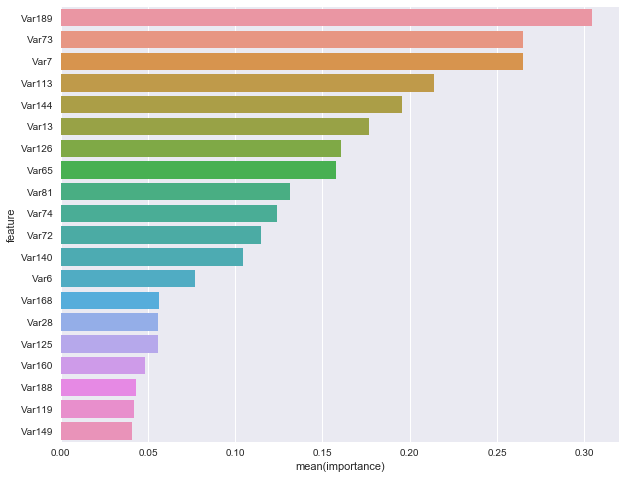

In [56]:
sub = pd.DataFrame()
sub['feature'] = top20.columns
sub['importance'] = np.array(top20).reshape(20,)
#sub = sub.sort_values(by='importance', ascending=False)
#sub
fig = plt.figure(figsize=(10, 8))
seaborn.barplot(sub['importance'][:20], sub['feature'][:20], orient='h')

Распределение для оттока


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010C3DCF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011D04080>]], dtype=object)

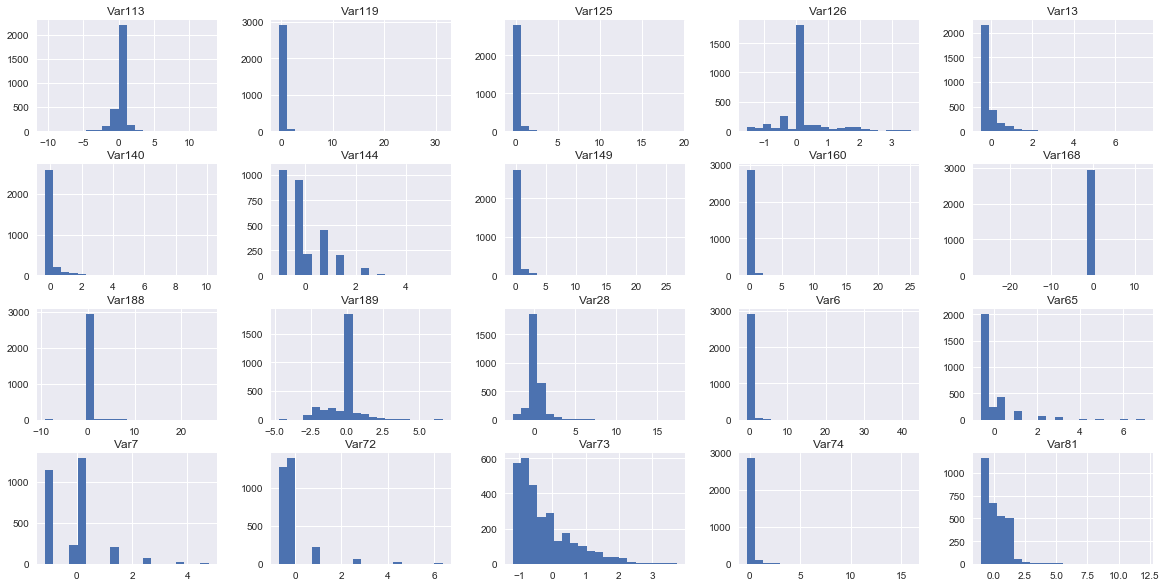

In [16]:
#num_data20=num_data1[top20.columns]
print "Распределение для оттока (label=1)"
num_scaled_data1[top20.columns].hist(figsize=(20,10),layout=(4,5),bins=20)
#num_data20.diff().hist(figsize=(20,20),layout=(4,5),bins=20)

Распределение для НЕ оттока(label=-1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012A6DCF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F4E87B8>]], dtype=object)

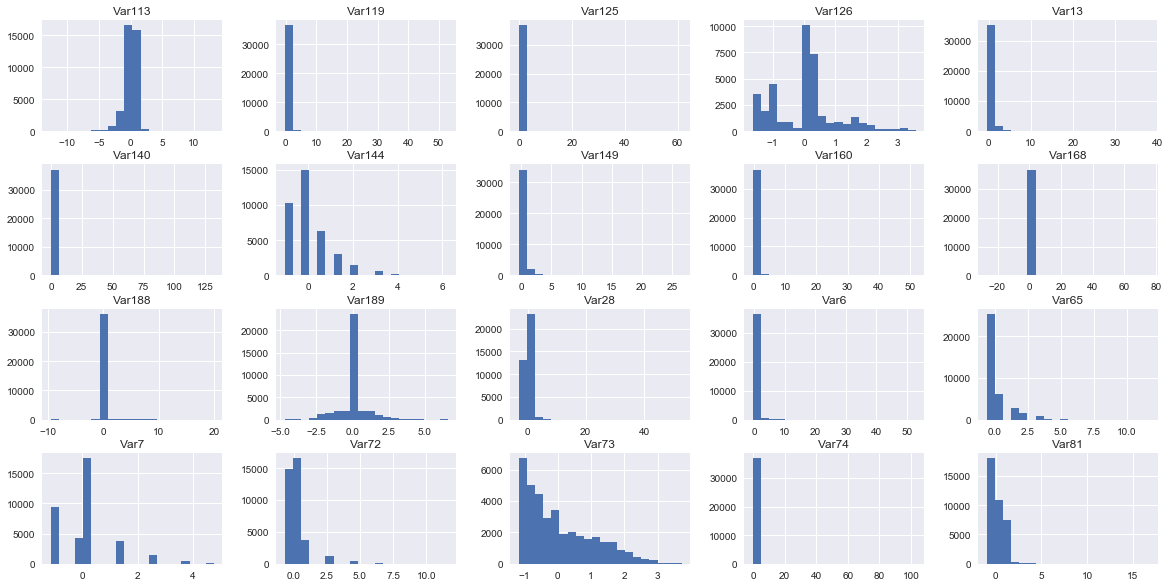

In [17]:
print "Распределение для НЕ оттока(label=-1)"
num_scaled_data0[top20.columns].hist(figsize=(20,10),layout=(4,5),bins=20)

In [ ]:
#Визуализируем признаки попарно.Используем seaborn.pairplot

C:\Users\oleg.markovsky\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


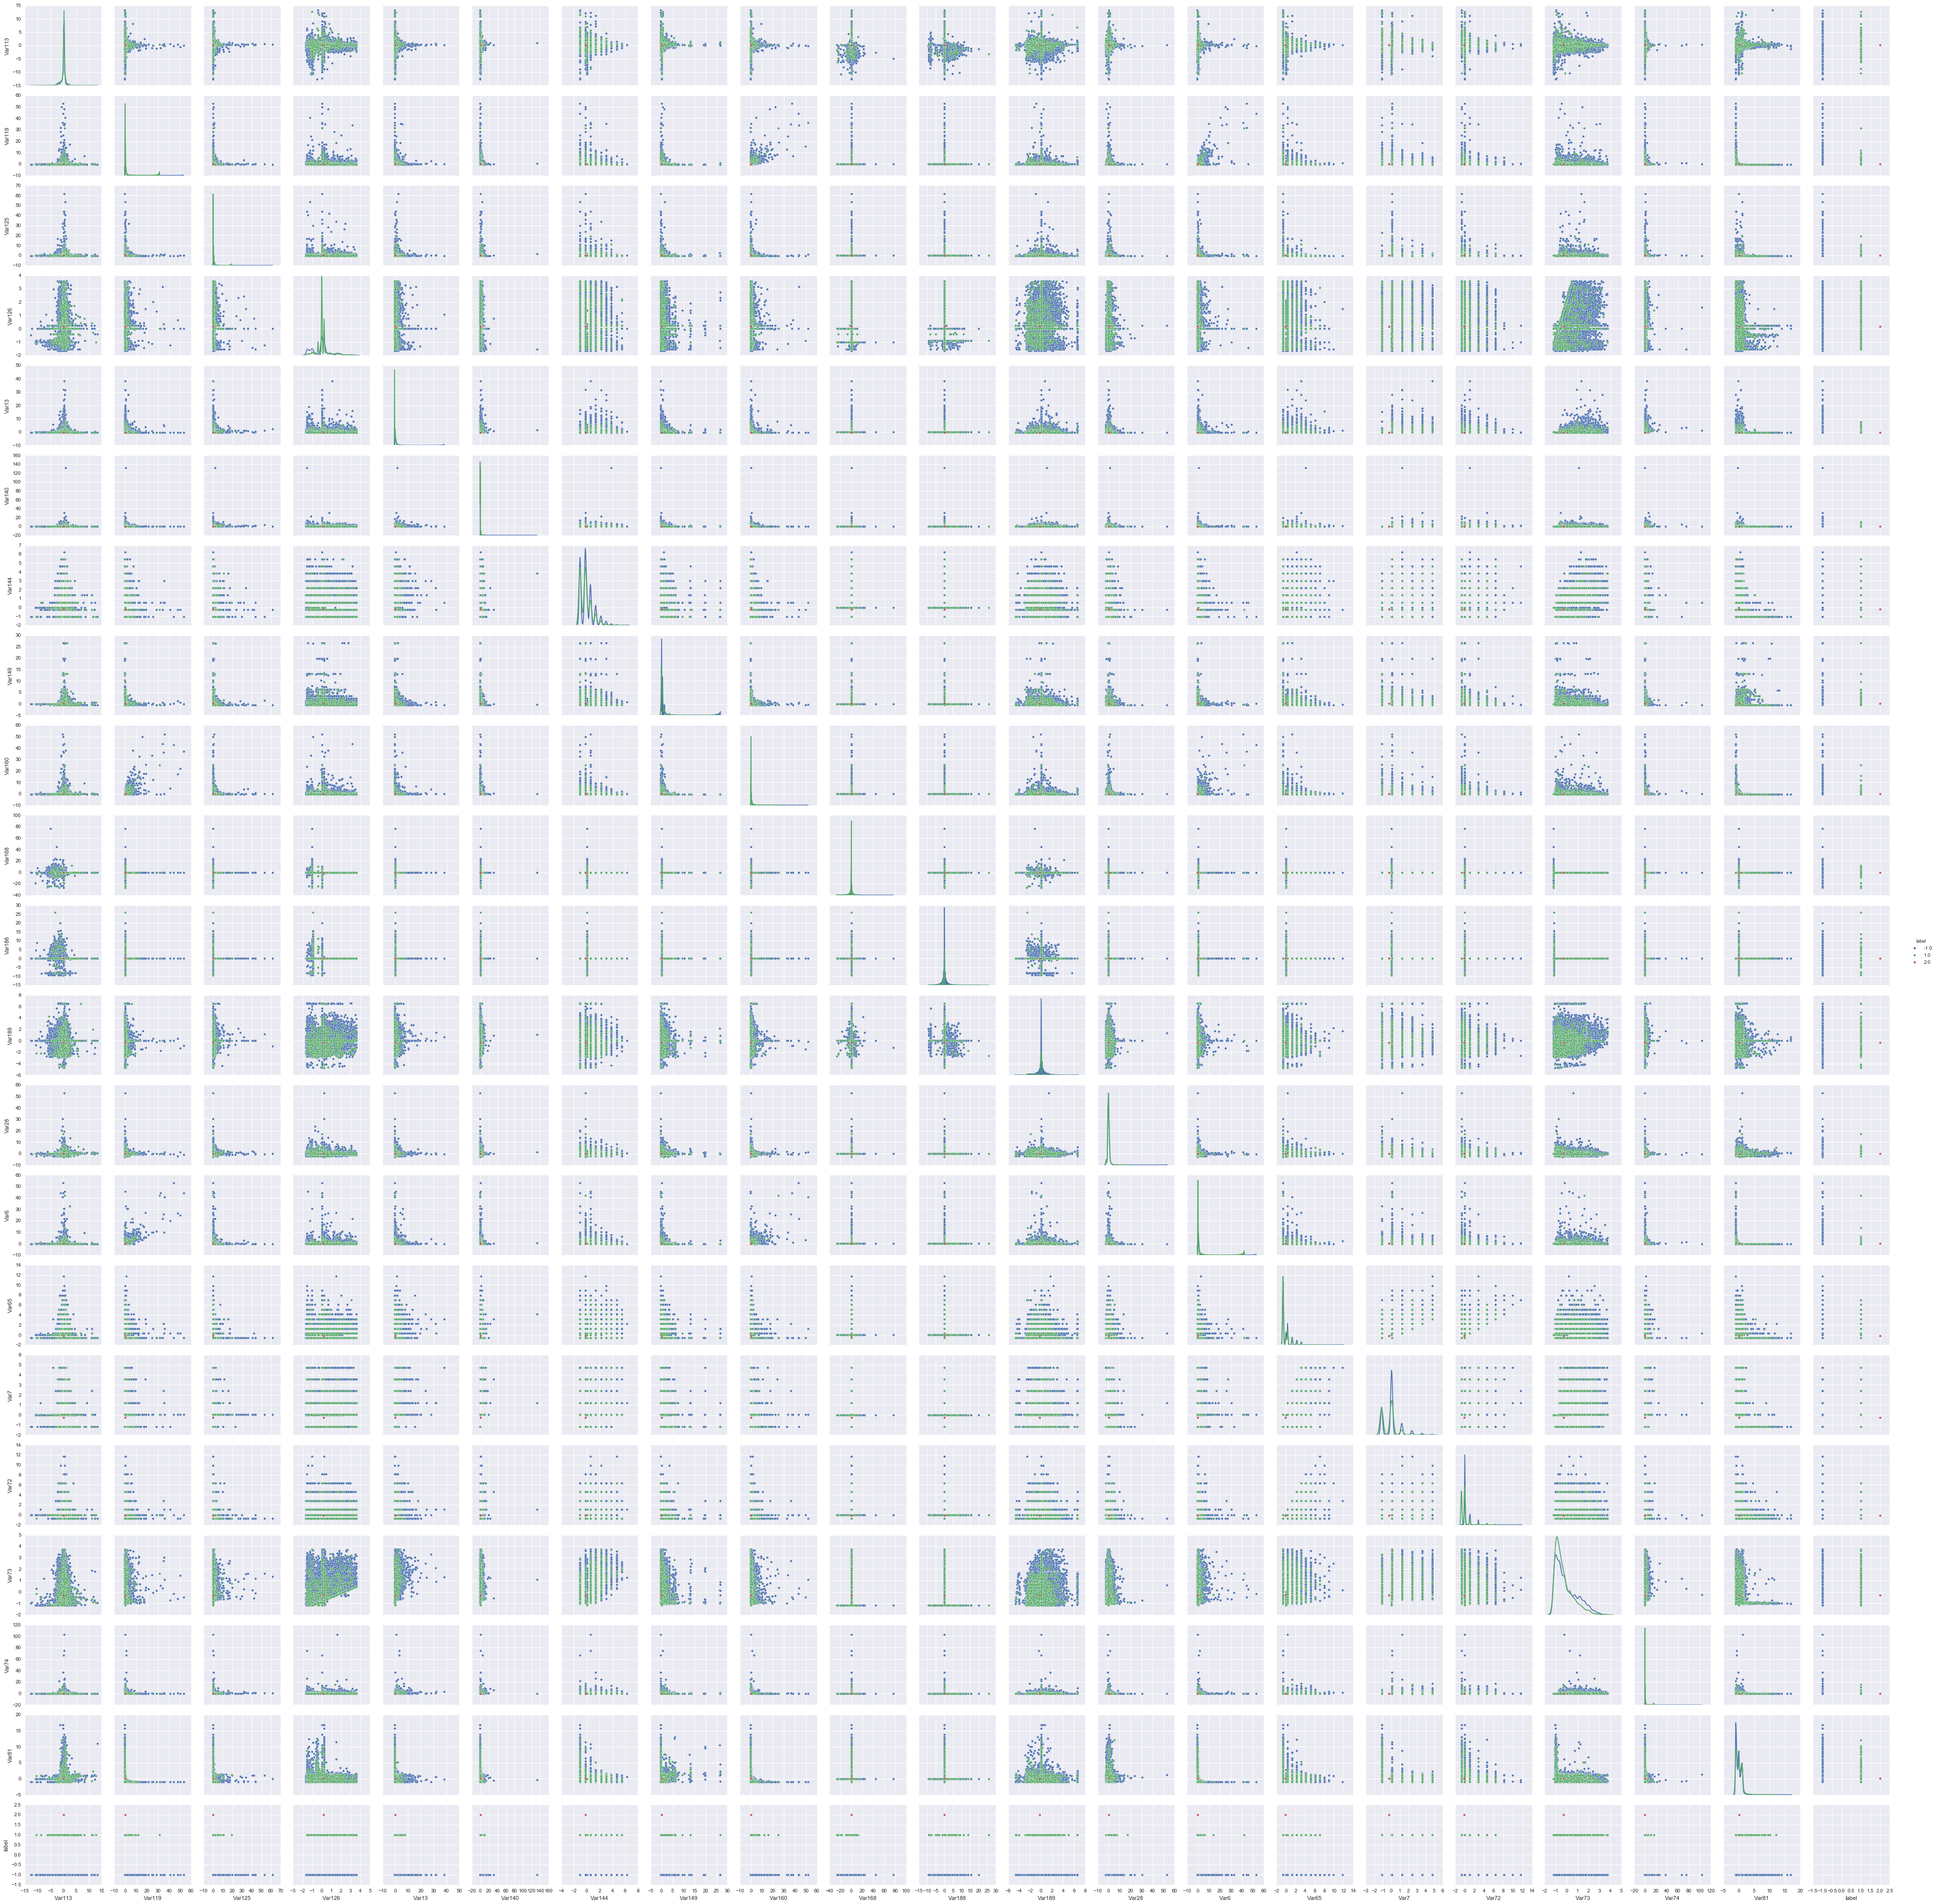

In [12]:
num_data20=num_scaled_data[top20.columns|['label']]
seaborn.pairplot(num_data20,hue='label',diag_kind="kde")

            Var7     Var65     Var72      Var6    Var160    Var119
Var189       NaN       NaN       NaN       NaN       NaN       NaN
Var73        NaN       NaN       NaN       NaN       NaN       NaN
Var7         NaN  0.647794       NaN       NaN       NaN       NaN
Var113       NaN       NaN       NaN       NaN       NaN       NaN
Var144       NaN       NaN       NaN       NaN       NaN       NaN
Var13        NaN       NaN       NaN       NaN       NaN       NaN
Var126       NaN       NaN       NaN       NaN       NaN       NaN
Var65   0.647794       NaN  0.672387       NaN       NaN       NaN
Var81        NaN       NaN       NaN       NaN       NaN       NaN
Var74        NaN       NaN       NaN       NaN       NaN       NaN
Var72        NaN  0.672387       NaN       NaN       NaN       NaN
Var140       NaN       NaN       NaN       NaN       NaN       NaN
Var6         NaN       NaN       NaN       NaN       NaN  0.734106
Var168       NaN       NaN       NaN       NaN       NaN      

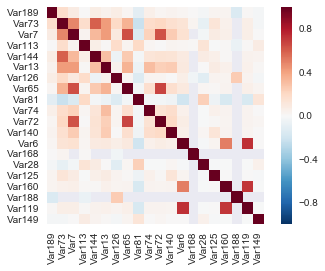

In [56]:
#Дополнительно посмотрим есть ли сильно зависимые признаки среди top20.Может их потом удалить ?!
corr = num_data[top20.columns].corr()
print corr[(corr > 0.64) * (corr < 1.0)].dropna(axis=1,how="all")
seaborn.heatmap(corr, square=True)

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

[ 60 132  75  30  39  62  85  17 170  92]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C81EC88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000025C81438>]], dtype=object)

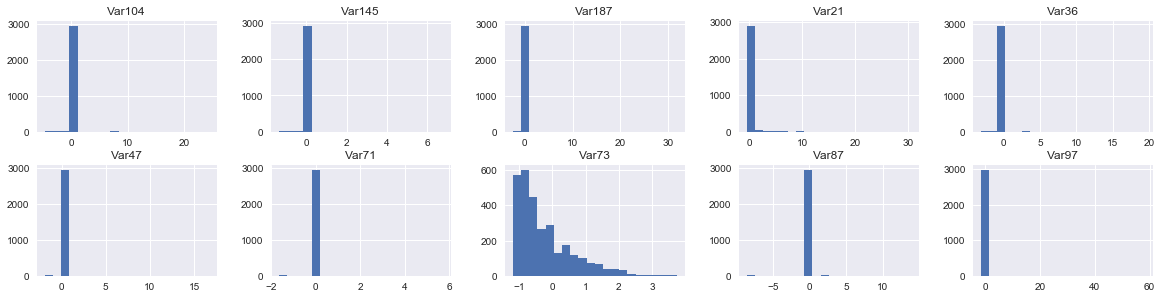

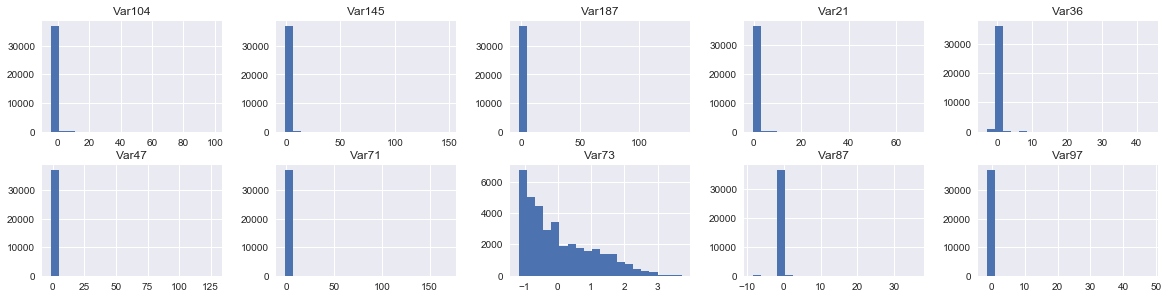

In [18]:
random_col=np.random.randint(len(num_scaled_data.columns), size=10)
print random_col
num_scaled_data1[random_col].hist(figsize=(20,10),layout=(4,5),bins=20)
num_scaled_data0[random_col].hist(figsize=(20,10),layout=(4,5),bins=20)

C:\Users\Oleg\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Oleg\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Oleg\Anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


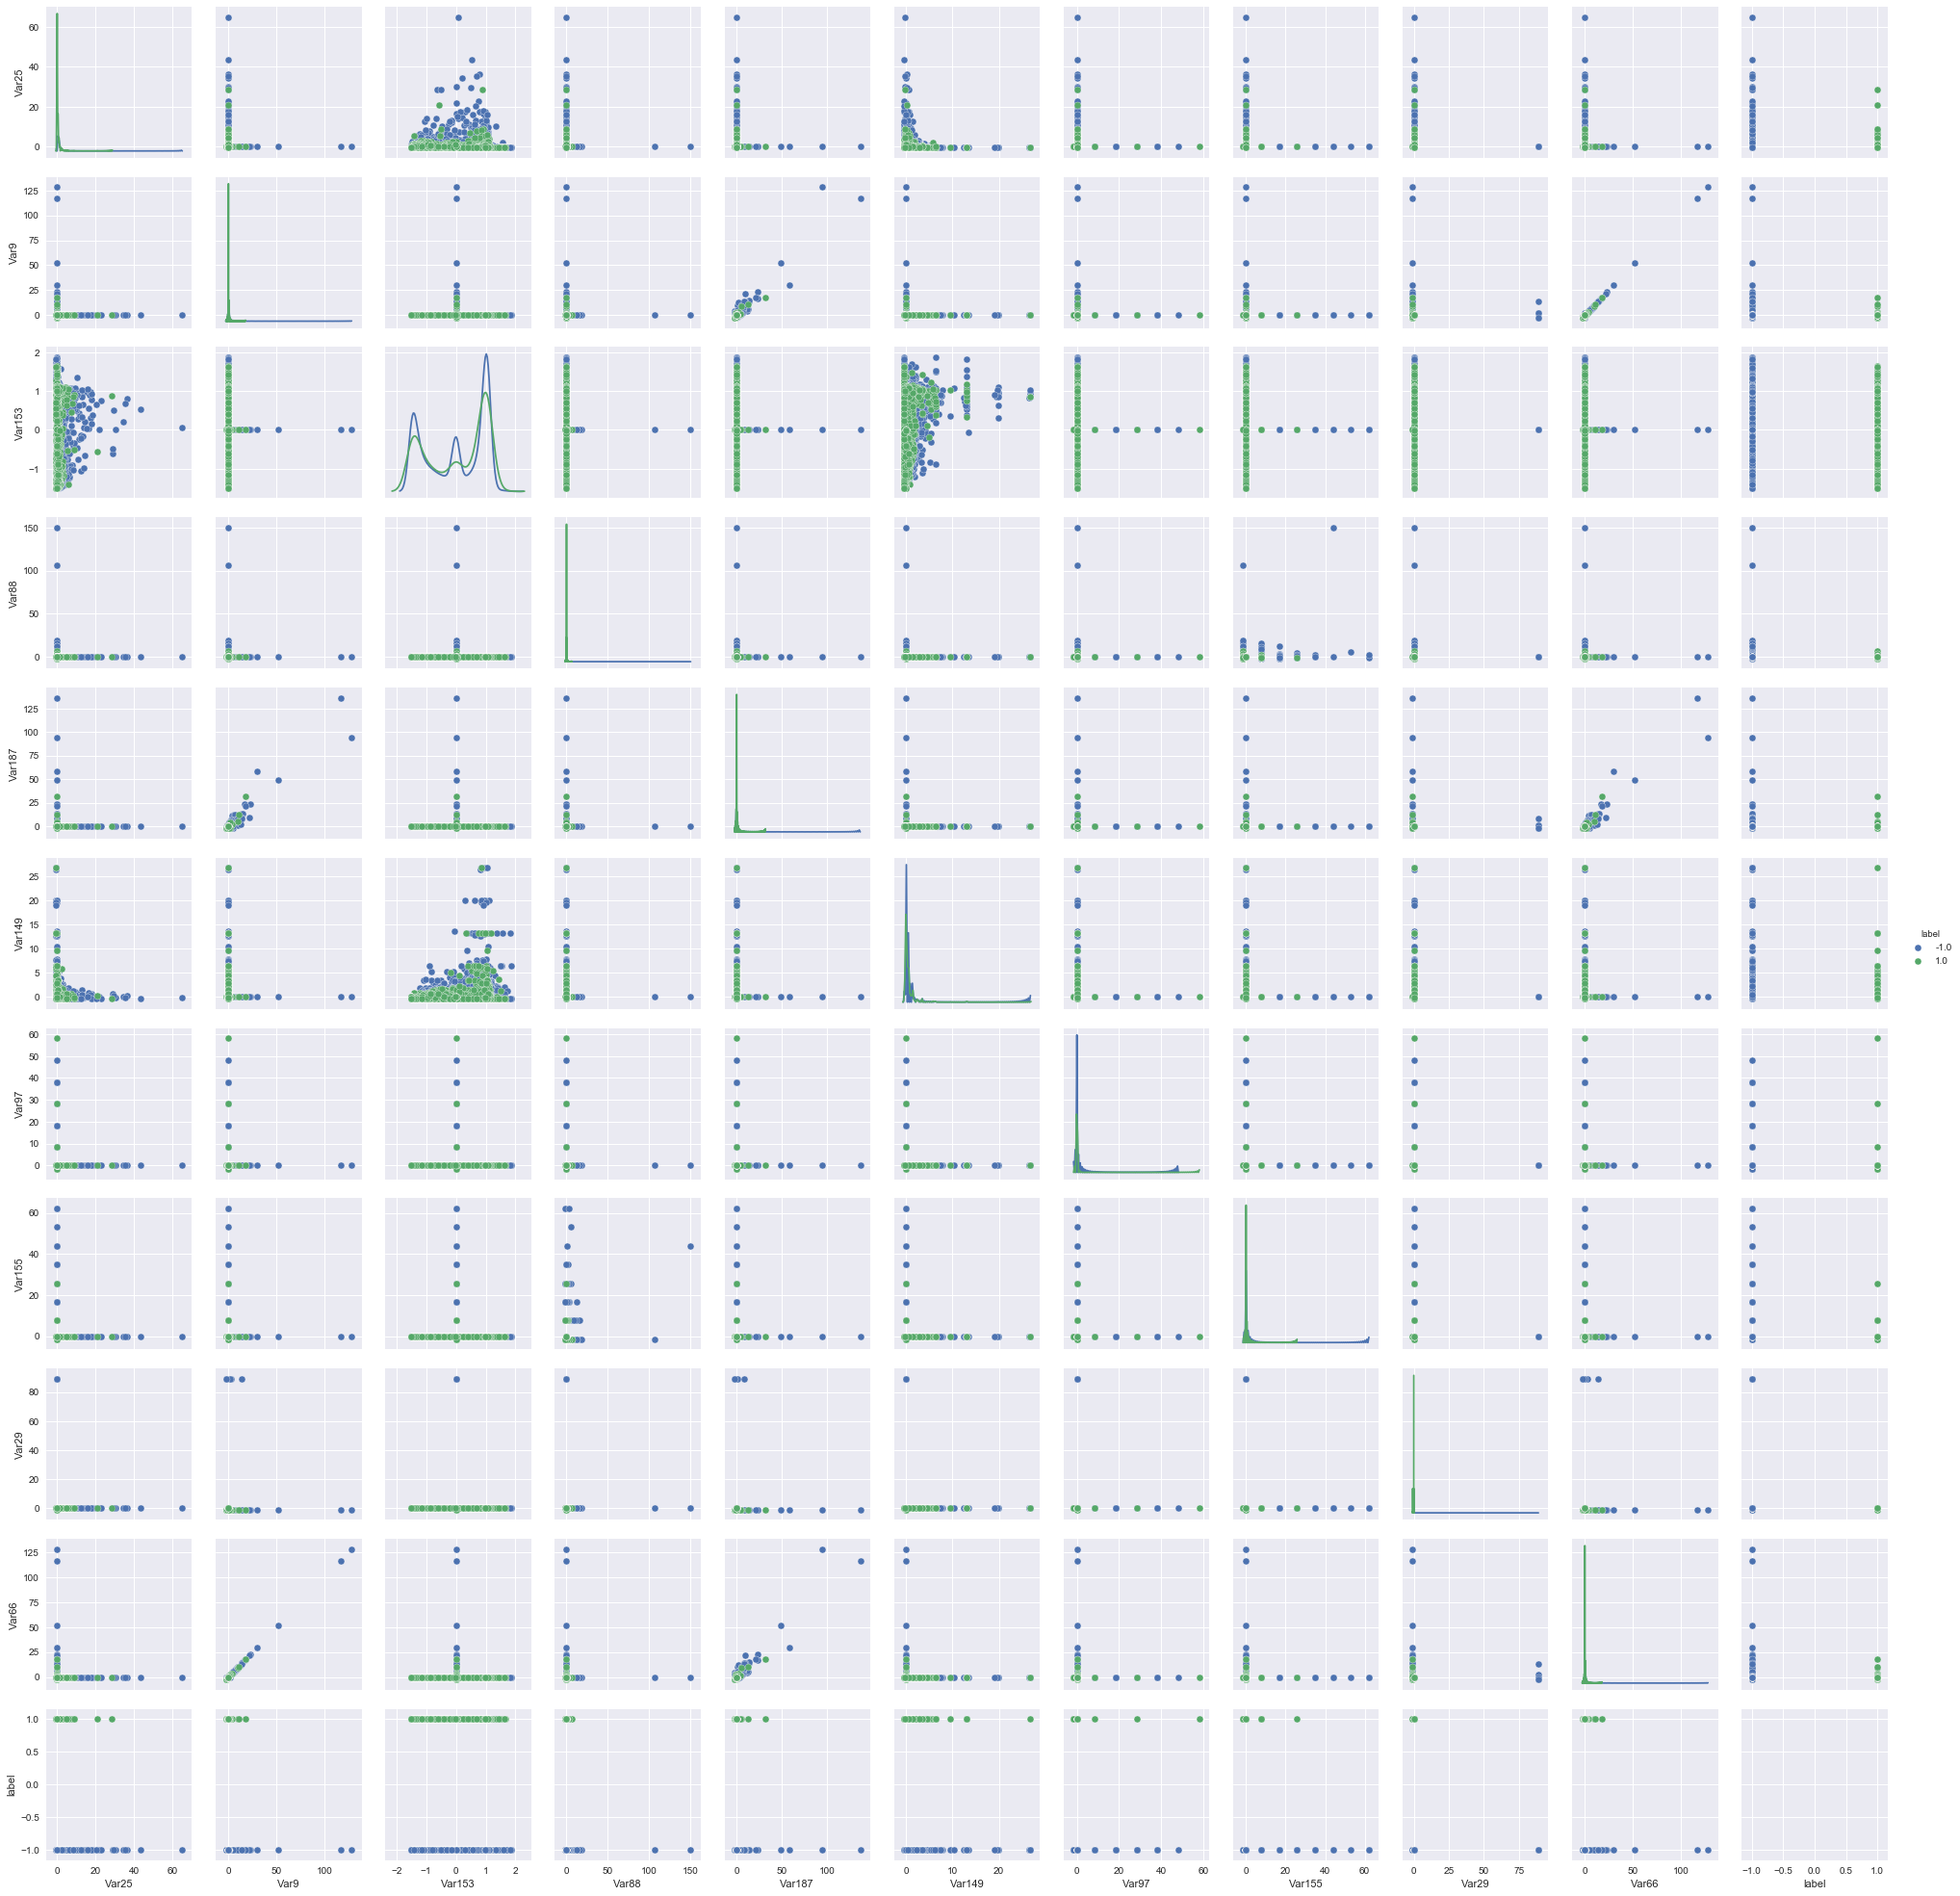

In [26]:
r10=num_scaled_data[random_col].join(label)
seaborn.pairplot(r10,hue='label',diag_kind="kde")

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

       Var118    Var129    Var104    Var105    Var123  Var146     Var64  \
40000     0.0  0.000139  0.000305  0.000305  0.000424  0.0007  0.000938   

          Var16    Var121      Var4  
40000  0.001078  0.001229  0.001234  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C810080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001D9C6DD8>]], dtype=object)

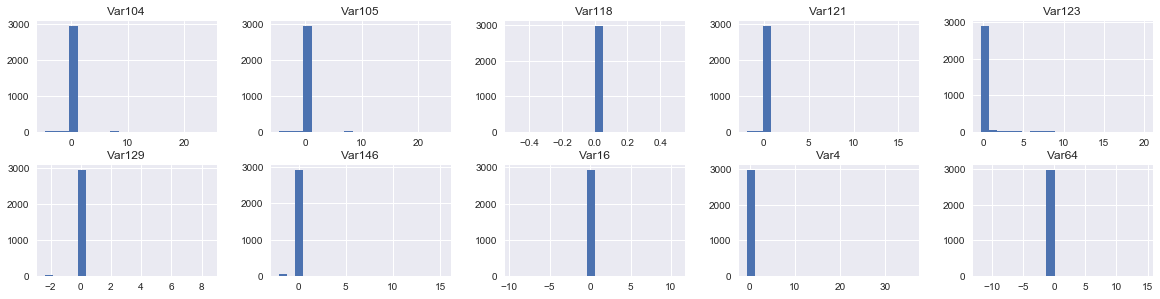

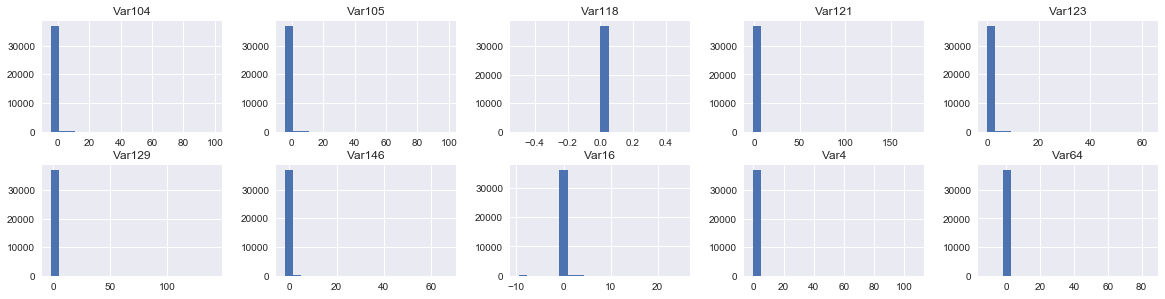

In [19]:
min10=(np.absolute(res)).nsmallest(10,40000).T
print min10
num_scaled_data1[min10.columns].hist(figsize=(20,10),layout=(4,5),bins=20)
num_scaled_data0[min10.columns].hist(figsize=(20,10),layout=(4,5),bins=20)

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [15]:
cat_data=cat_data.join(label)
cat_data1=cat_data[cat_data.label==1.0]
cat_data0=cat_data[cat_data.label==-1.0]
cat_features=cat_data.columns.drop(label)
print 'Кол-во категориальных переменных',len(cat_features)
cat_features

Кол-во категориальных переменных 38


Index([u'Var191', u'Var192', u'Var193', u'Var194', u'Var195', u'Var196',
       u'Var197', u'Var198', u'Var199', u'Var200', u'Var201', u'Var202',
       u'Var203', u'Var204', u'Var205', u'Var206', u'Var207', u'Var208',
       u'Var210', u'Var211', u'Var212', u'Var213', u'Var214', u'Var215',
       u'Var216', u'Var217', u'Var218', u'Var219', u'Var220', u'Var221',
       u'Var222', u'Var223', u'Var224', u'Var225', u'Var226', u'Var227',
       u'Var228', u'Var229'],
      dtype='object')

In [ ]:
#Строю распределения с помощью seaborn.countplot по 9 шт., т.к. у меня плохо работает эта функция -постоянно виснет 
#при большом кол-ве признаков

Index([u'Var191', u'Var192', u'Var193', u'Var194', u'Var195', u'Var196',
       u'Var197', u'Var198', u'Var199', u'Var200', u'Var201', u'Var202',
       u'Var203', u'Var204', u'Var205', u'Var206', u'Var207', u'Var208',
       u'Var210', u'Var211', u'Var212', u'Var213', u'Var214', u'Var215',
       u'Var216', u'Var217', u'Var218', u'Var219', u'Var220', u'Var221',
       u'Var222', u'Var223', u'Var224', u'Var225', u'Var226', u'Var227',
       u'Var228', u'Var229', u'label'],
      dtype='object')


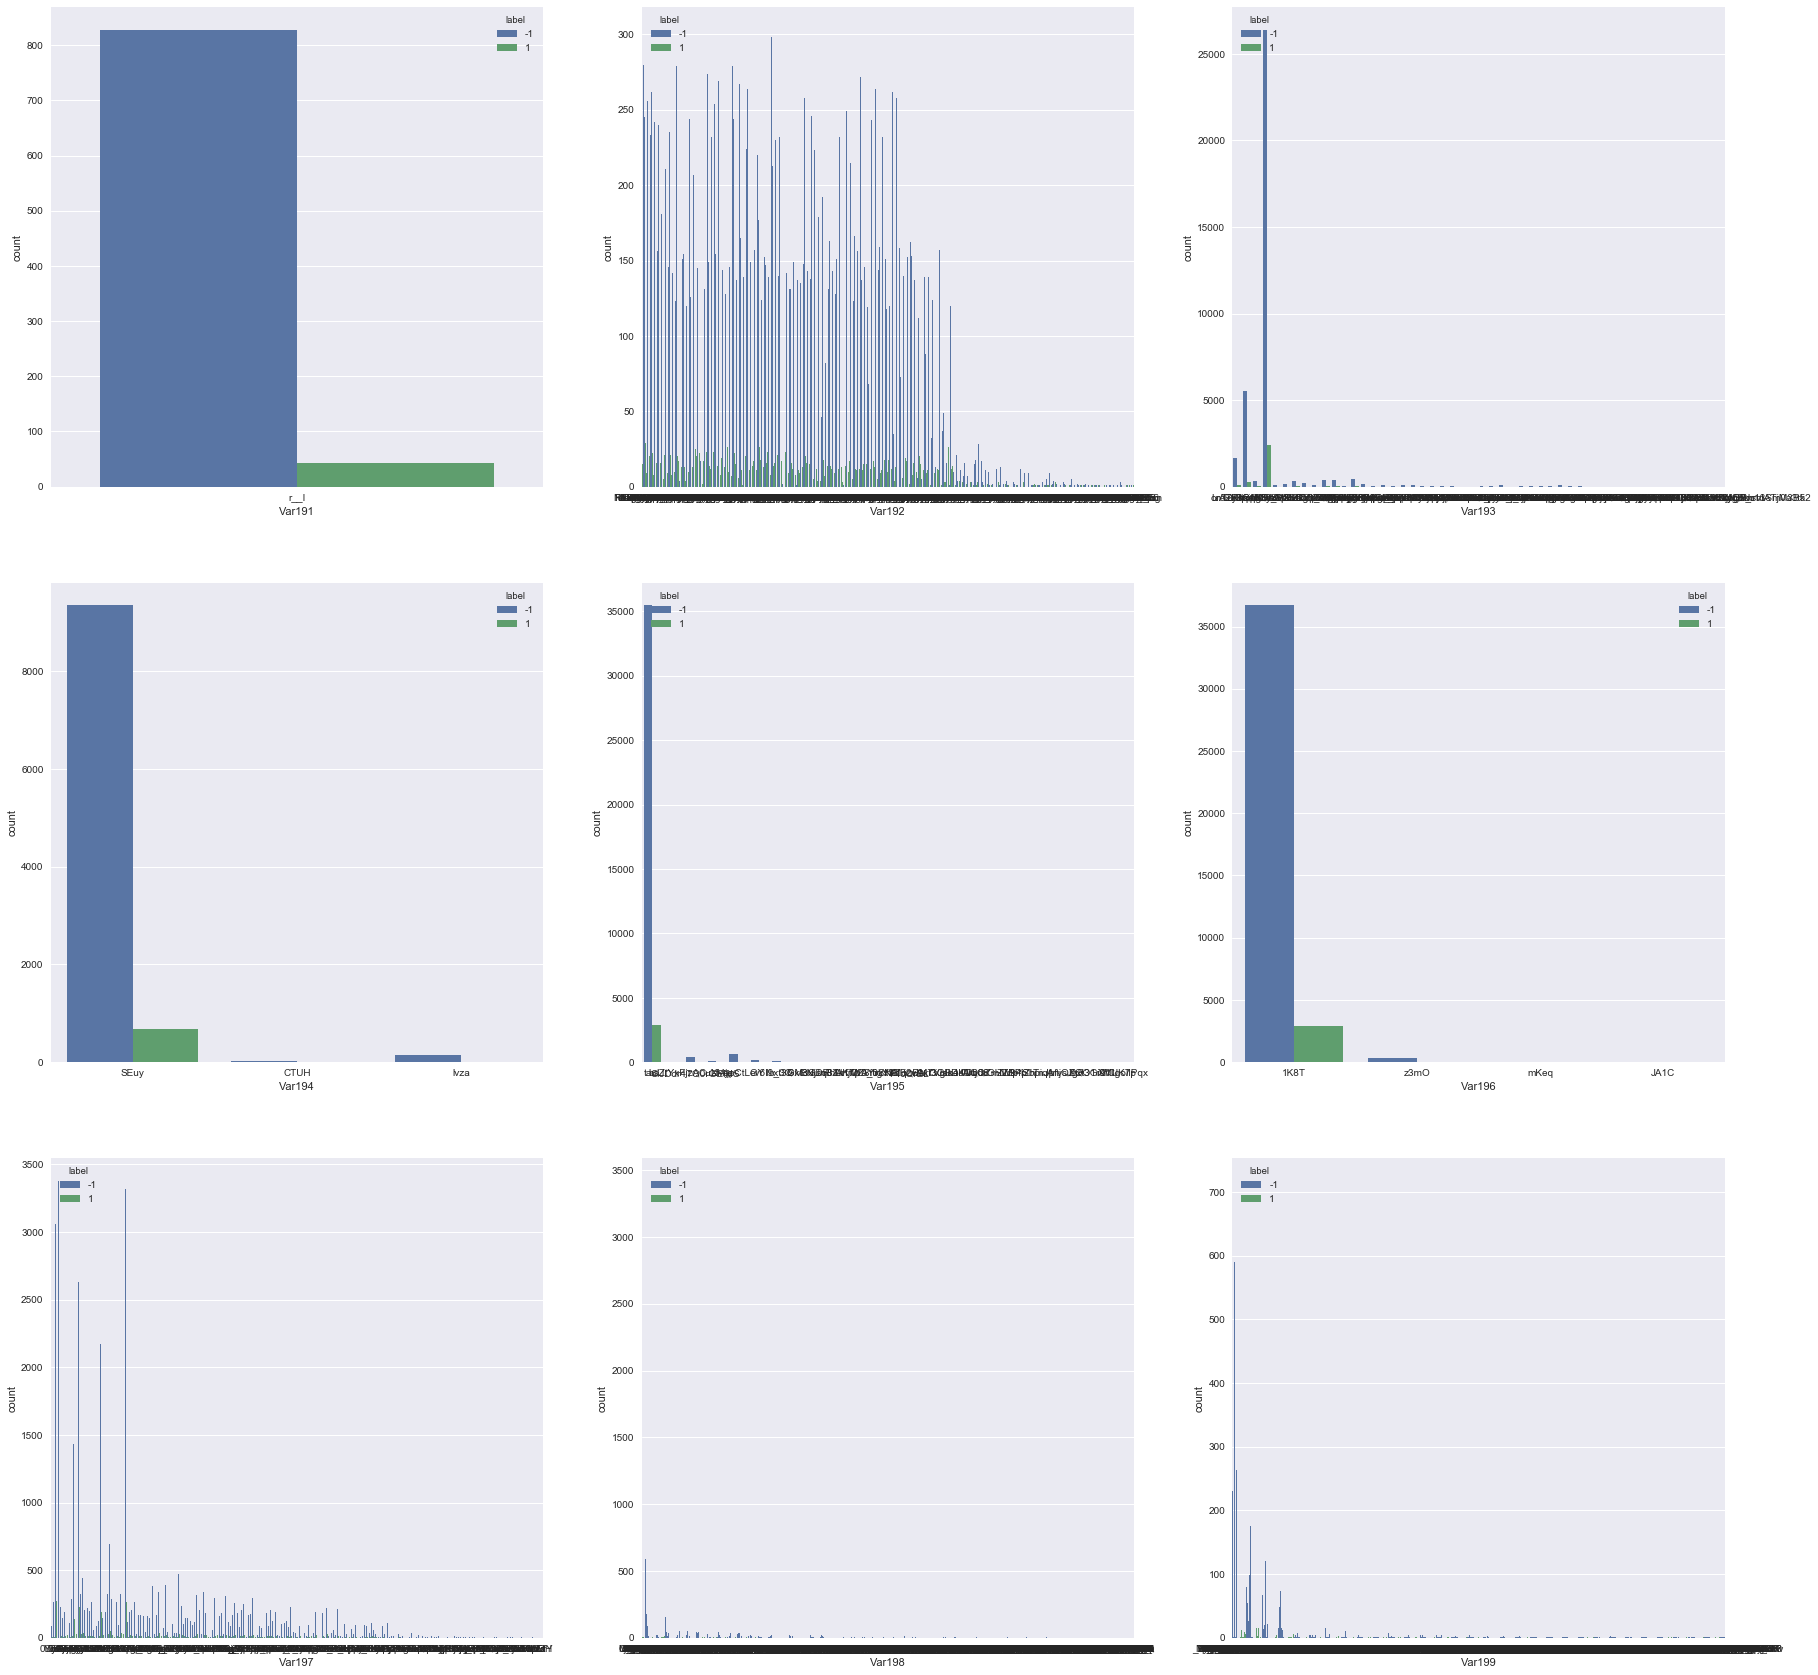

In [10]:
#Выводим распределения
fig, axes = plt.subplots(3, 3, figsize=(30, 30))
for i in range(0,9):
    #print cat_features[i]
    seaborn.countplot(x=cat_features[i], data=cat_data,hue='label',ax=axes[i / 3, i % 3])

Index([u'Var191', u'Var192', u'Var193', u'Var194', u'Var195', u'Var196',
       u'Var197', u'Var198', u'Var199', u'Var200', u'Var201', u'Var202',
       u'Var203', u'Var204', u'Var205', u'Var206', u'Var207', u'Var208',
       u'Var210', u'Var211', u'Var212', u'Var213', u'Var214', u'Var215',
       u'Var216', u'Var217', u'Var218', u'Var219', u'Var220', u'Var221',
       u'Var222', u'Var223', u'Var224', u'Var225', u'Var226', u'Var227',
       u'Var228', u'Var229', u'label'],
      dtype='object')


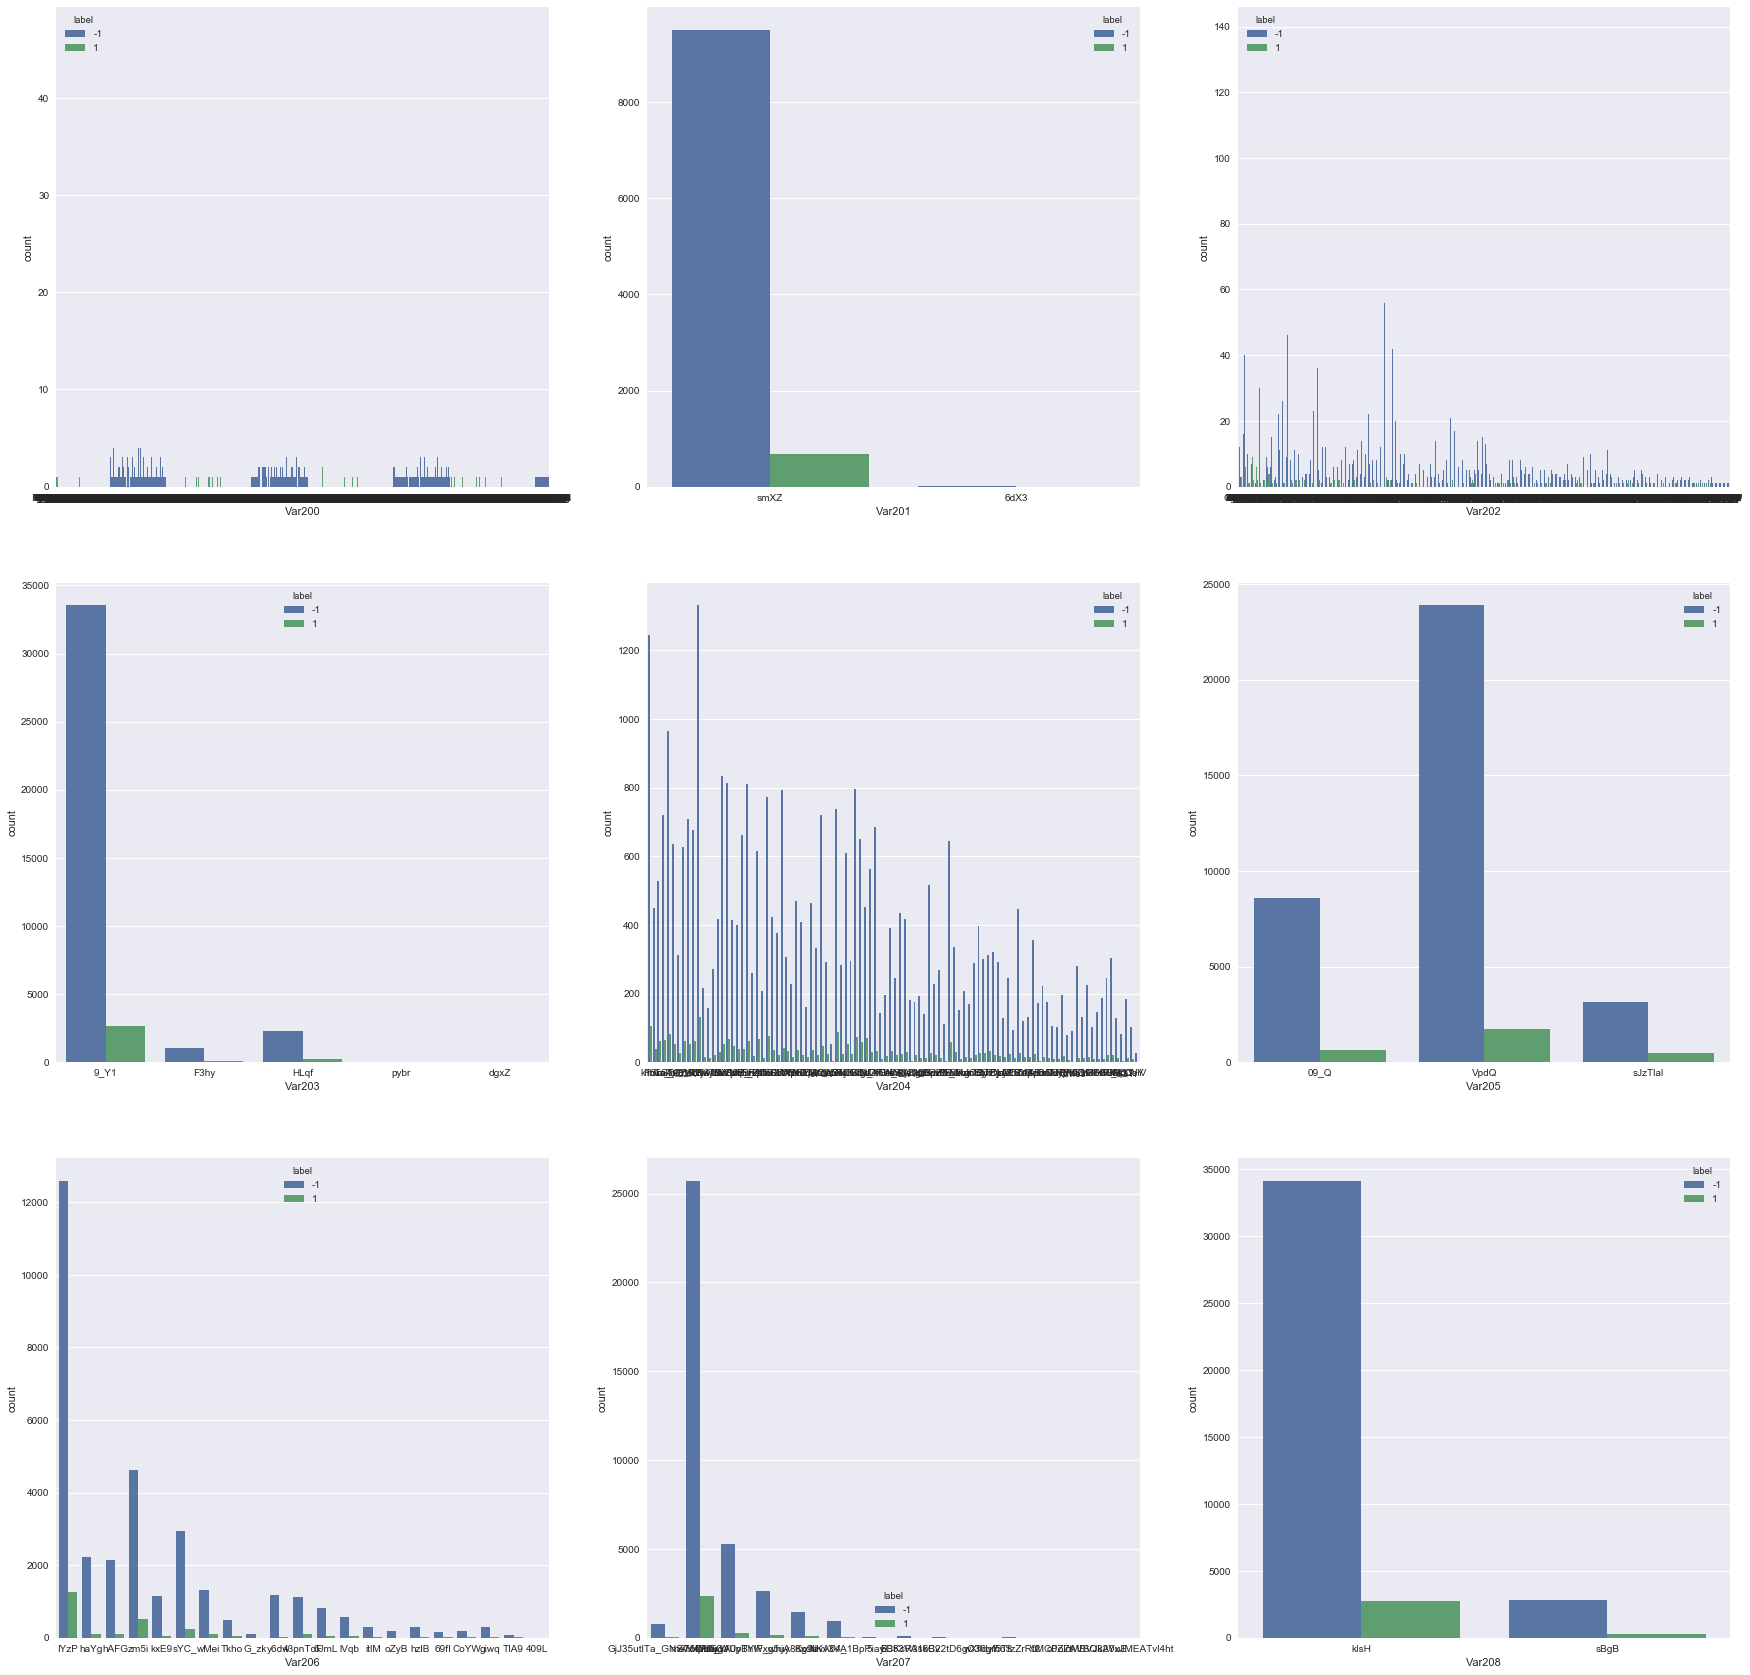

In [14]:
k=0
print cat_features
fig, axes = plt.subplots(3, 3, figsize=(30, 30))
for i in range(9,18):
    #print cat_features[i]
    seaborn.countplot(x=cat_features[i], data=cat_data,hue='label',ax=axes[k / 3, k % 3])
    k+=1

Index([u'Var191', u'Var192', u'Var193', u'Var194', u'Var195', u'Var196',
       u'Var197', u'Var198', u'Var199', u'Var200', u'Var201', u'Var202',
       u'Var203', u'Var204', u'Var205', u'Var206', u'Var207', u'Var208',
       u'Var210', u'Var211', u'Var212', u'Var213', u'Var214', u'Var215',
       u'Var216', u'Var217', u'Var218', u'Var219', u'Var220', u'Var221',
       u'Var222', u'Var223', u'Var224', u'Var225', u'Var226', u'Var227',
       u'Var228', u'Var229', u'label'],
      dtype='object')


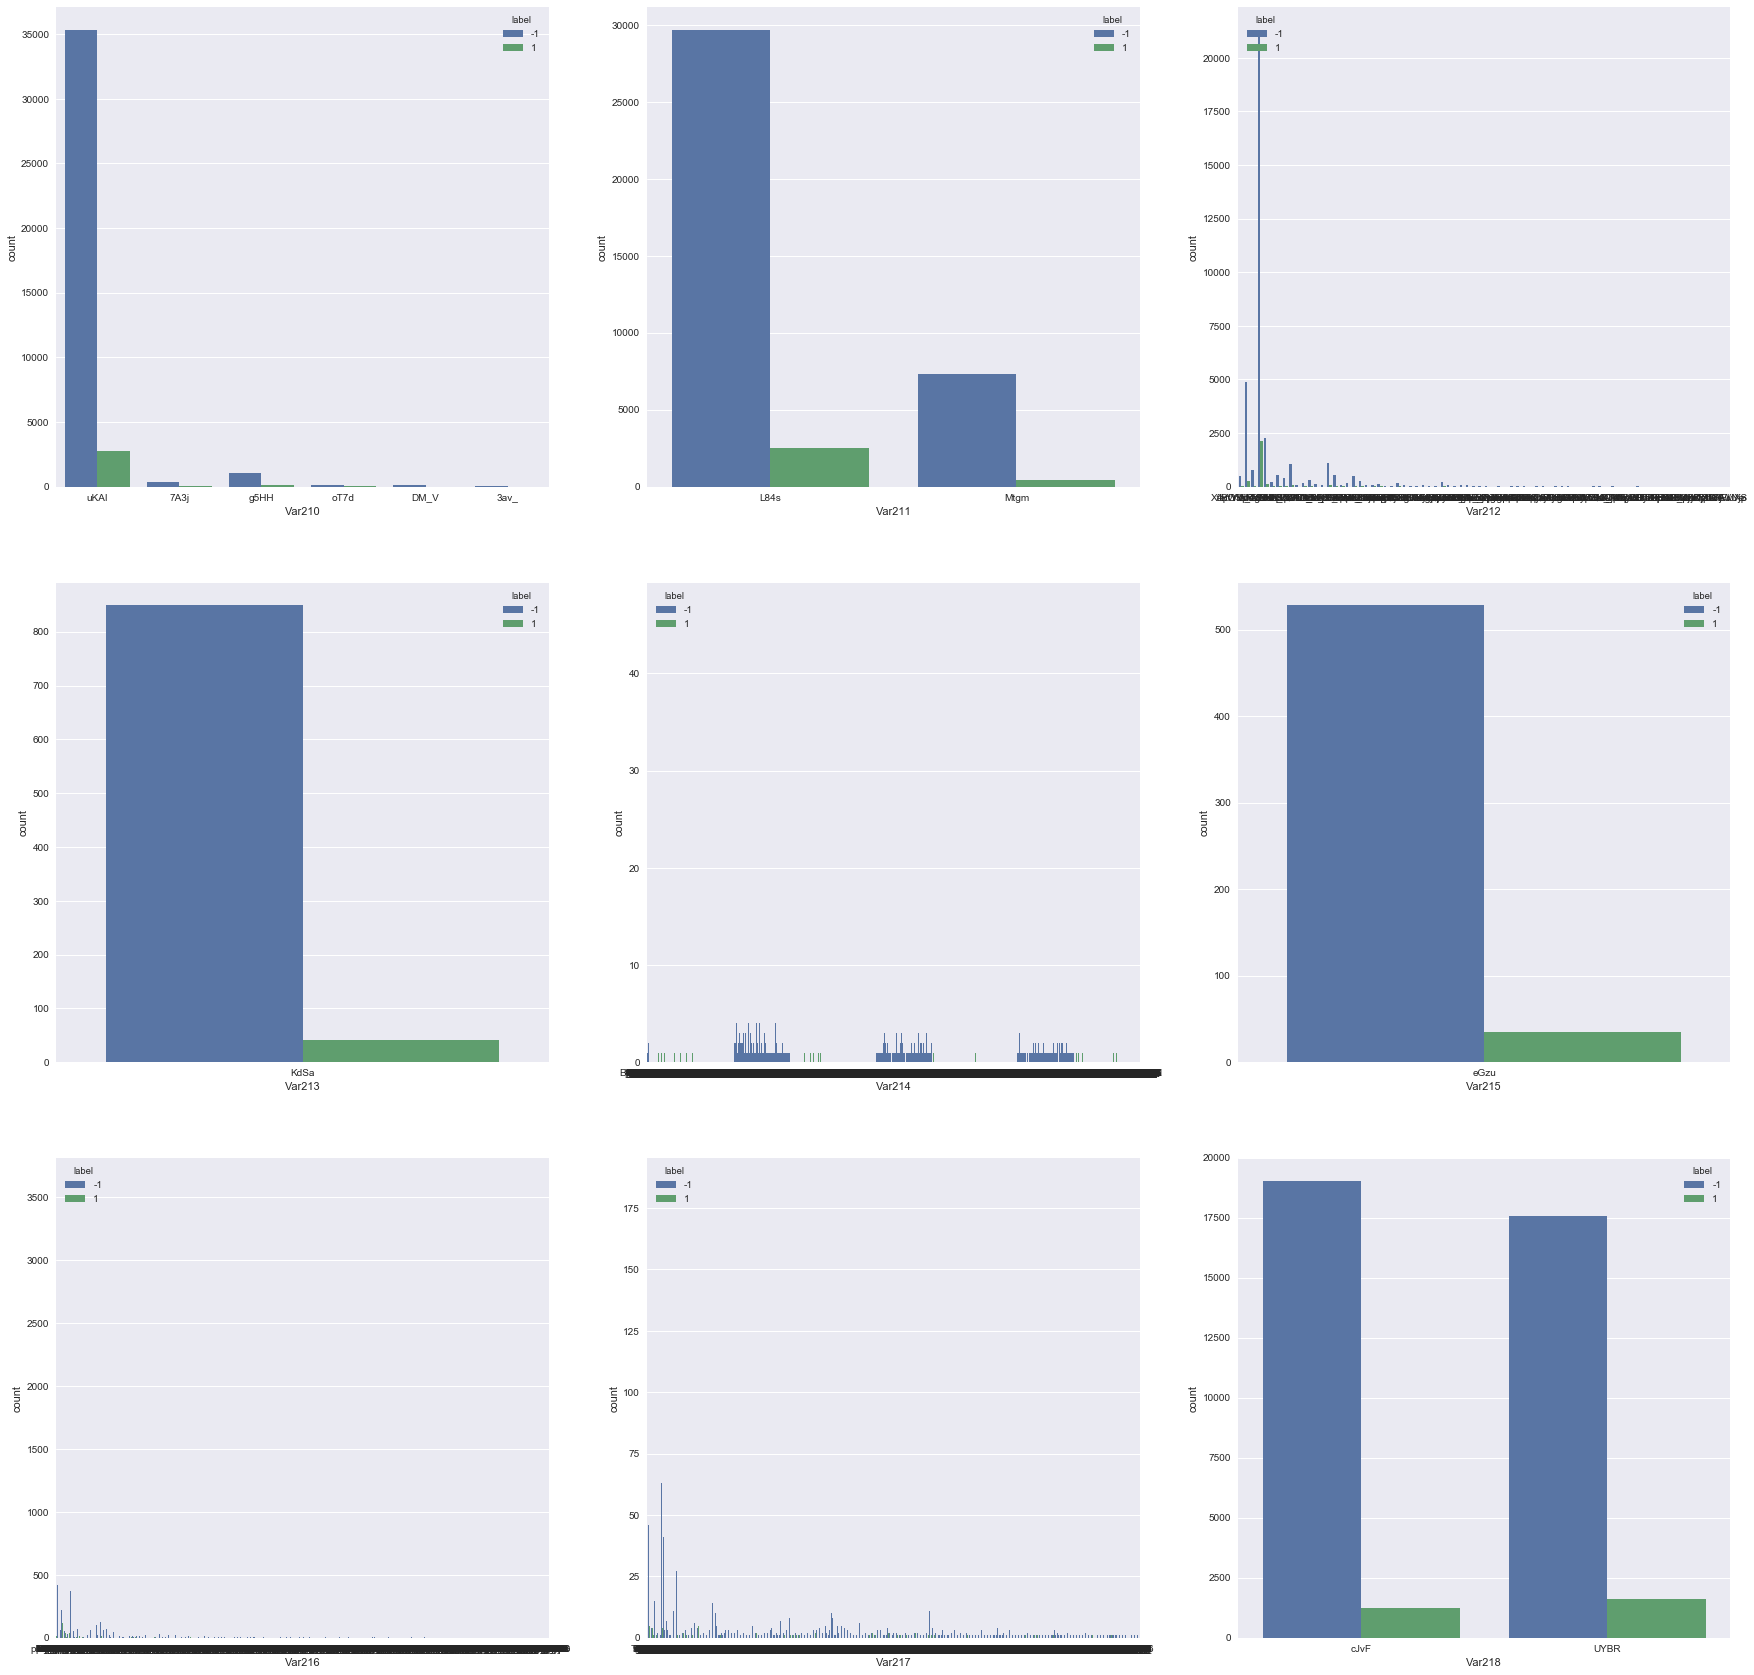

In [15]:
k=0
print cat_features
fig, axes = plt.subplots(3, 3, figsize=(30, 30))
for i in range(18,27):
    #print cat_features[i]
    seaborn.countplot(x=cat_features[i], data=cat_data,hue='label',ax=axes[k / 3, k % 3])
    k+=1

Index([u'Var191', u'Var192', u'Var193', u'Var194', u'Var195', u'Var196',
       u'Var197', u'Var198', u'Var199', u'Var200', u'Var201', u'Var202',
       u'Var203', u'Var204', u'Var205', u'Var206', u'Var207', u'Var208',
       u'Var210', u'Var211', u'Var212', u'Var213', u'Var214', u'Var215',
       u'Var216', u'Var217', u'Var218', u'Var219', u'Var220', u'Var221',
       u'Var222', u'Var223', u'Var224', u'Var225', u'Var226', u'Var227',
       u'Var228', u'Var229'],
      dtype='object')


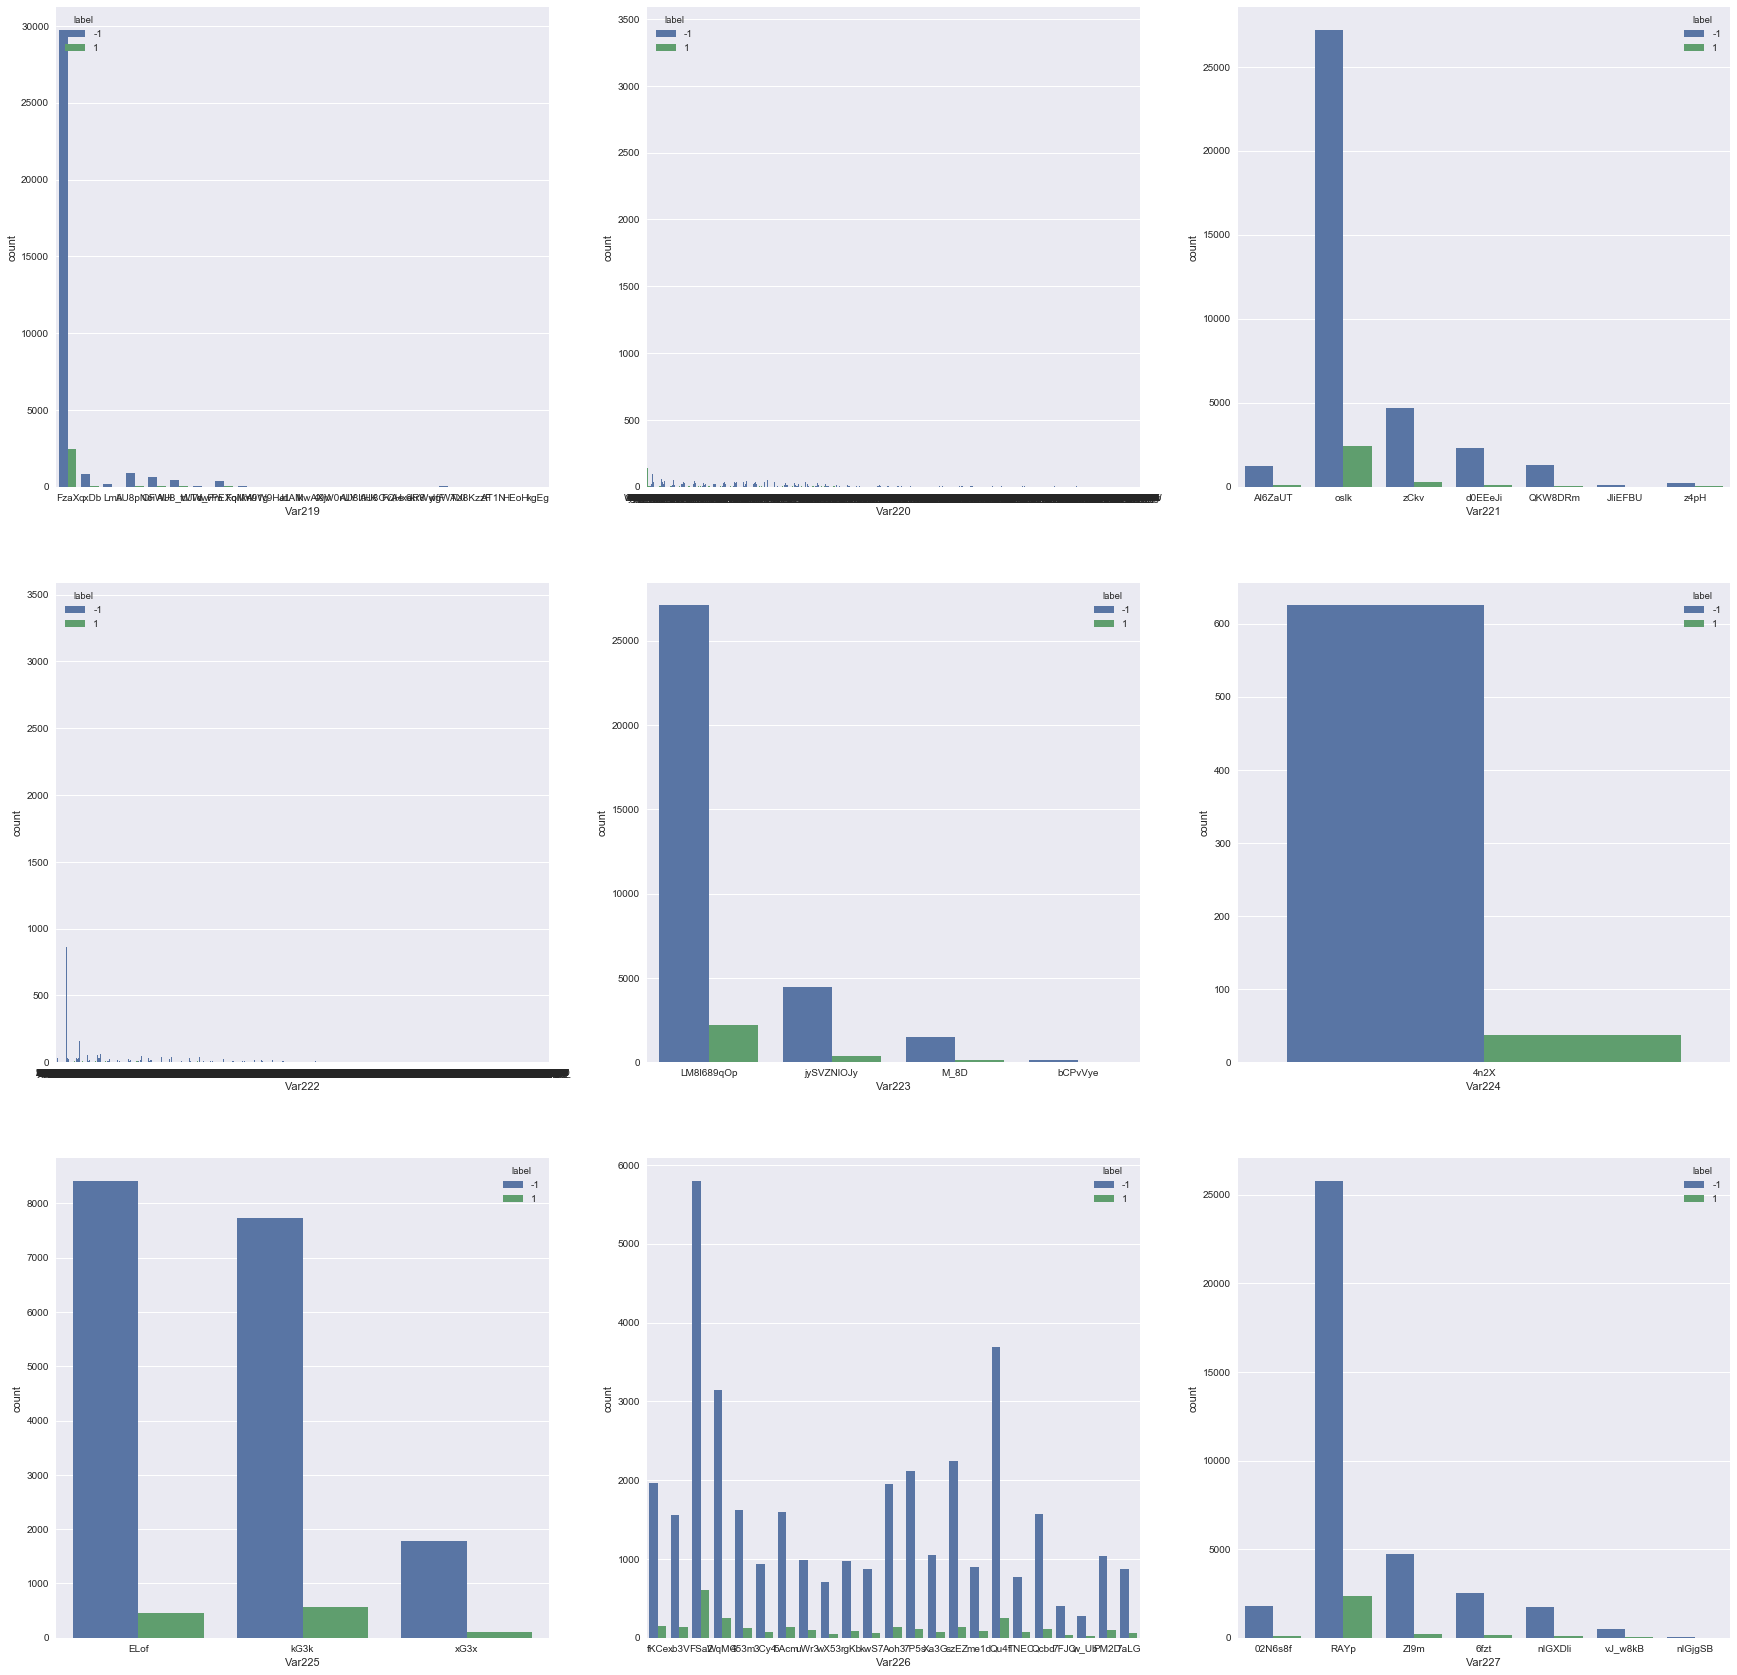

In [36]:
k=0
print cat_features
fig, axes = plt.subplots(3, 3, figsize=(30, 30))
for i in range(27,36):
    seaborn.countplot(x=cat_features[i], data=cat_data,hue='label',ax=axes[k / 3, k % 3])
    k+=1

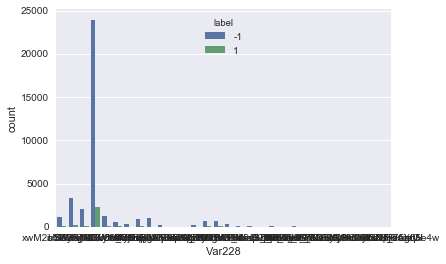

In [40]:
seaborn.countplot(x=cat_features[36], data=cat_data,hue='label')

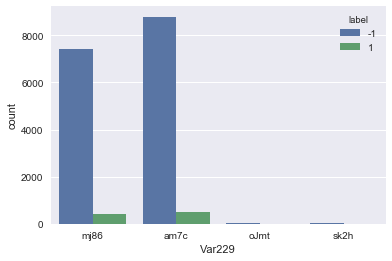

In [41]:
seaborn.countplot(x=cat_features[37], data=cat_data,hue='label')

            Var7     Var65     Var72      Var6    Var160    Var119
Var189       NaN       NaN       NaN       NaN       NaN       NaN
Var73        NaN       NaN       NaN       NaN       NaN       NaN
Var7         NaN  0.647794       NaN       NaN       NaN       NaN
Var113       NaN       NaN       NaN       NaN       NaN       NaN
Var144       NaN       NaN       NaN       NaN       NaN       NaN
Var13        NaN       NaN       NaN       NaN       NaN       NaN
Var126       NaN       NaN       NaN       NaN       NaN       NaN
Var65   0.647794       NaN  0.672387       NaN       NaN       NaN
Var81        NaN       NaN       NaN       NaN       NaN       NaN
Var74        NaN       NaN       NaN       NaN       NaN       NaN
Var72        NaN  0.672387       NaN       NaN       NaN       NaN
Var140       NaN       NaN       NaN       NaN       NaN       NaN
Var6         NaN       NaN       NaN       NaN       NaN  0.734106
Var168       NaN       NaN       NaN       NaN       NaN      

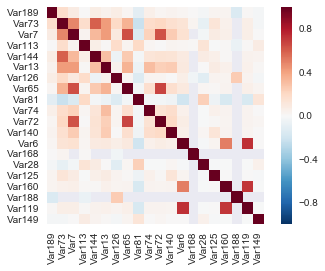

In [55]:
corr = num_data[top20.columns].corr()
print corr[(corr > 0.64) * (corr < 1.0)].dropna(axis=1,how="all")
seaborn.heatmap(corr, square=True)

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

In [17]:
k=0
from scipy import stats
from math import sqrt
for var in cat_data.columns.drop(label):
    subtable=pd.crosstab(cat_data[var], cat_data.label)
    ch2,p,dof,e=stats.chi2_contingency(subtable,correction=True)
    cramer=sqrt(ch2/(sum(subtable.sum())-1))
    if p<0.05 : 
        k+=1
        print 'Var ,p,cramer',var,p,cramer
print k

Var ,p,cramer Var192 3.99630033384e-48 0.14969127625
Var ,p,cramer Var193 1.14206532151e-19 0.0702074738479
Var ,p,cramer Var195 0.0104598051513 0.0316717076239
Var ,p,cramer Var197 0.0142203038493 0.0818833831469
Var ,p,cramer Var199 9.14071841492e-97 0.407846029428
Var ,p,cramer Var204 9.1895474609e-08 0.0690241633612
Var ,p,cramer Var205 3.00766632316e-46 0.073836813684
Var ,p,cramer Var206 2.66284970754e-38 0.0809860139295
Var ,p,cramer Var207 1.42955093043e-22 0.0582763330968
Var ,p,cramer Var210 8.60680630526e-19 0.0485406271165
Var ,p,cramer Var211 1.6981394423e-10 0.0319325003343
Var ,p,cramer Var212 1.51814001669e-28 0.0870212155013
Var ,p,cramer Var216 5.08798883314e-06 0.228942896378
Var ,p,cramer Var218 6.74581839128e-19 0.0447096825785
Var ,p,cramer Var221 1.34254706302e-18 0.0491194371312
Var ,p,cramer Var225 4.03484822907e-05 0.0325802485444
Var ,p,cramer Var226 6.67338085049e-11 0.0485162711945
Var ,p,cramer Var227 2.6667123097e-24 0.0556201407312
Var ,p,cramer Var228 7

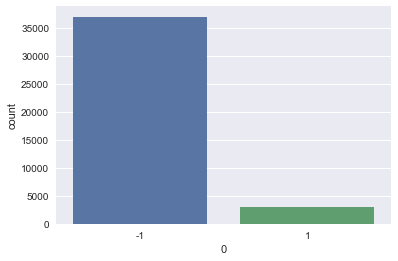

In [11]:
seaborn.countplot(label[0])

В датасете много пропусков.Есть переменные -18 (мы их исключили вначале), которые состоят только из пропусков:'Var8', 'Var15', 'Var20', 'Var31', 'Var32', 'Var39', 'Var42', 'Var48', 'Var52', 'Var55', 'Var79', 'Var141', 'Var167', 'Var169', 'Var175', 'Var185', 'Var209', 'Var230'
Масштаб признаков различается на порядки, поэтому однозначно необходимо масштабирование.Среди вещественных переменных наиболее сильно коррелирующих с целевой признаком много признаков с очень большим перекосом в сторону какого-то одного значения ,возможно они сильно влияют на целевой признак .Есть признаки со сложной структурой гистограммы.данные разнородны, и описать их вероятностным распределением трудно. 
На pairplot трудно что-либо понять ,но облака точек разного цвета различимы и их видимо возможно разделить.
Наибольшее влияние должны оказать top20 вещественных признаков,но среди top20 есть сильно коррелирующие меджу собой признаки : Var7     Var65     Var72      Var6    Var160    Var119.Их наверное нужно будет удалить.
Из категориальных состоят из одной категории и явно не несут никакого смысла:191,213,215,224
Также похожи на шумовые :Var194, Var196, Var201, Var203, Var205, Var208, Var211, Var218,Var223, Var225,Var229. Распределение просто копирует рапределение меток
Однозначно необходим отбор признаков.
